In [2]:


import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pickle


In [3]:
!ls

drive  sample_data


In [4]:
# Specify the path to the .dat file
file_path = '/content/drive/MyDrive/DEAP DS/s01.dat'

# Load data from .dat file
with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')


data = data['data']
data.shape

(40, 40, 8064)

In [8]:
data[0]

array([[ 9.48231681e-01,  1.65333533e+00,  3.01372577e+00, ...,
        -2.82648937e+00, -4.47722969e+00, -3.67692812e+00],
       [ 1.24706590e-01,  1.39008270e+00,  1.83509881e+00, ...,
        -2.98702069e+00, -6.28780884e+00, -4.47429041e+00],
       [-2.21651099e+00,  2.29201682e+00,  2.74636923e+00, ...,
        -2.63707760e+00, -7.40651010e+00, -6.75590441e+00],
       ...,
       [ 2.30779684e+02,  6.96716323e+02,  1.19512165e+03, ...,
         1.01080949e+03,  1.28312149e+03,  1.51996480e+03],
       [-1.54180981e+03, -1.61798052e+03, -1.69268642e+03, ...,
        -1.57842691e+04, -1.57823160e+04, -1.57808512e+04],
       [ 6.39054310e-03,  6.39054310e-03,  6.39054310e-03, ...,
        -9.76081241e-02, -9.76081241e-02, -9.76081241e-02]])

In [36]:
def hjorth_parameters(data):
    diff1 = np.diff(data, axis=2)
    diff2 = np.diff(diff1, axis=2)

    activity = np.var(data, axis=2)
    mobility = np.sqrt(np.var(diff1, axis=2) / activity)
    complexity = np.sqrt(np.var(diff2, axis=2) / np.var(diff1, axis=2)) / mobility

    return activity, mobility, complexity

In [23]:
def zero_crossing_rate(signal):
    return np.sum(signal[:-1] * signal[1:] < 0) / len(signal)


In [24]:
def waveform_length(signal):
    return np.sum(np.abs(np.diff(signal)))

def mean_absolute_value(signal):
    return np.mean(np.abs(signal))

# Function to calculate Root Mean Square (RMS)
def root_mean_square(signal):
    return np.sqrt(np.mean(np.square(signal)))


def entropy(signal):
    hist, _ = np.histogram(signal, bins=256, range=[0, 256], density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

In [5]:
path = '/content/drive/MyDrive/DEAP DS/'
files = os.listdir(path)

In [52]:
dat_files = [file for file in files if file.endswith('.dat')]

loaded data from s01.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s02.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s03.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s05.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s04.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s06.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s08.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s07.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s09.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s10.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s12.dat:
(40, 40, 8064)
-----------------------------------------
loaded data from s11.dat:
(40, 40, 8064)
-----------------------------------------
load

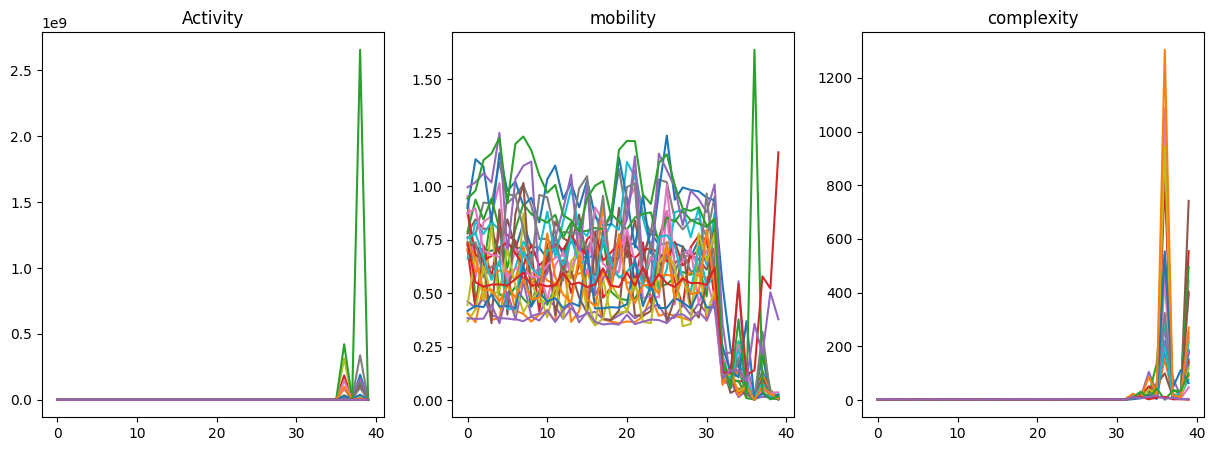

In [37]:
fig,axs = plt.subplots(1,3, figsize=(15,5))
for dat_file in dat_files:
  file_path = os.path.join(path,dat_file)
  with open(file_path,'rb') as file:
    data = pickle.load(file, encoding='latin1')
  data = data['data']
  activity, mobility, complexity = hjorth_parameters(data)
  axs[0].plot(activity[0])
  axs[0].set_title('Activity')
  #axs[0].legend()

  axs[1].plot(mobility[0])
  axs[1].set_title('mobility')
  #axs[1].legend()

  axs[2].plot(complexity[0])
  axs[2].set_title('complexity')
 # axs[2].legend()
  print(f'loaded data from {dat_file}:')
  print(data.shape)
  print('-----------------------------------------')

(40, 40, 8064)

In [26]:
activity, mobility, complexity = hjorth_parameters(data)

In [28]:
activity.shape

(40, 8064)

In [29]:
mobility.shape

(40, 8064)

In [30]:
complexity.shape

(40, 8064)

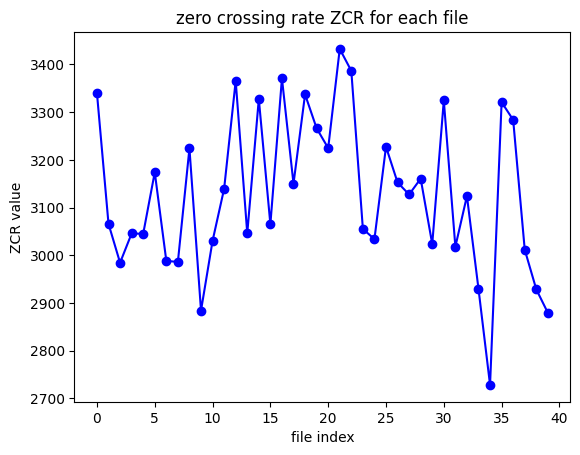

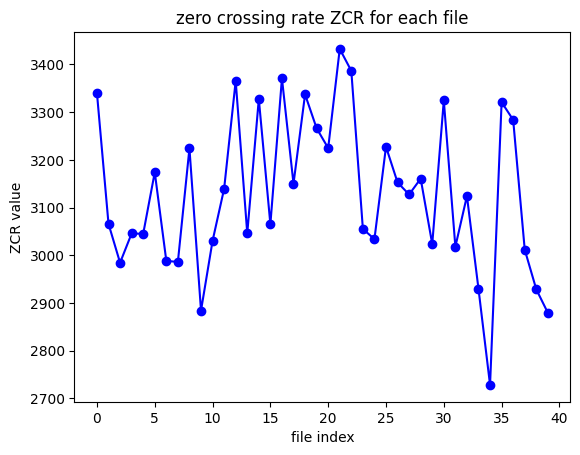

In [40]:

zcr_values = np.zeros(data.shape[0])
for i in range(data.shape[0]):
  zcr_values[i] = zero_crossing_rate(data[i,:])

plt.plot(zcr_values, marker='o',linestyle='-',color='b')
plt.title('zero crossing rate ZCR for each file')
plt.xlabel('file index')
plt.ylabel('ZCR value')
plt.show(())

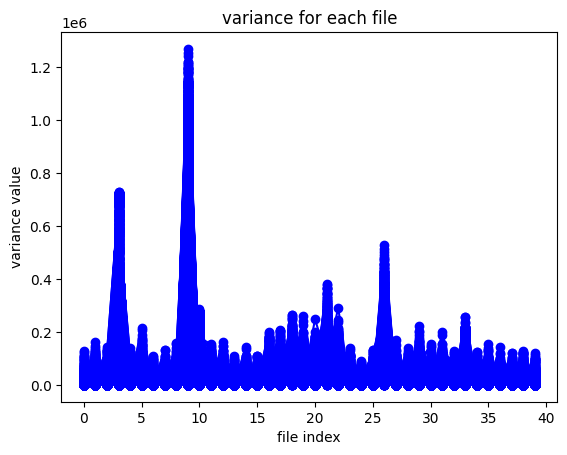

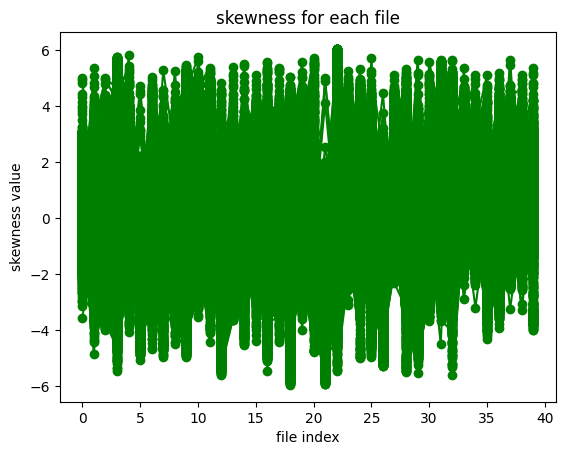

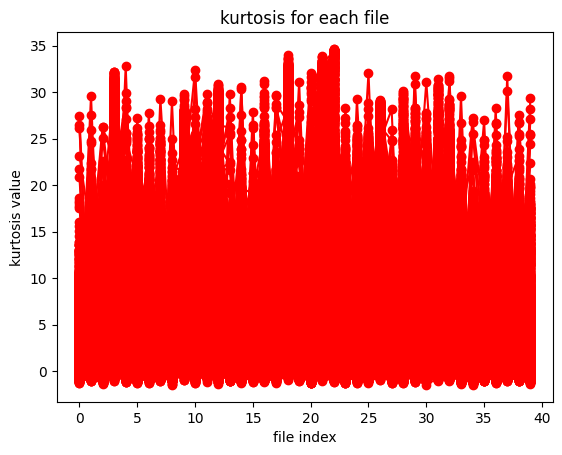

In [41]:
variance_values = np.var(data, axis=1)
skewness_values = skew(data, axis=1)
kurtosis_values = kurtosis(data, axis=1)

plt.plot(variance_values,marker='o',linestyle='-',color='b')
plt.title('variance for each file')
plt.xlabel('file index')
plt.ylabel('variance value')
plt.show()

plt.plot(skewness_values,marker='o',linestyle='-',color='g')
plt.title('skewness for each file')
plt.xlabel('file index')
plt.ylabel('skewness value')
plt.show()

plt.plot(kurtosis_values,marker='o',linestyle='-',color='r')
plt.title('kurtosis for each file')
plt.xlabel('file index')
plt.ylabel('kurtosis value')
plt.show()


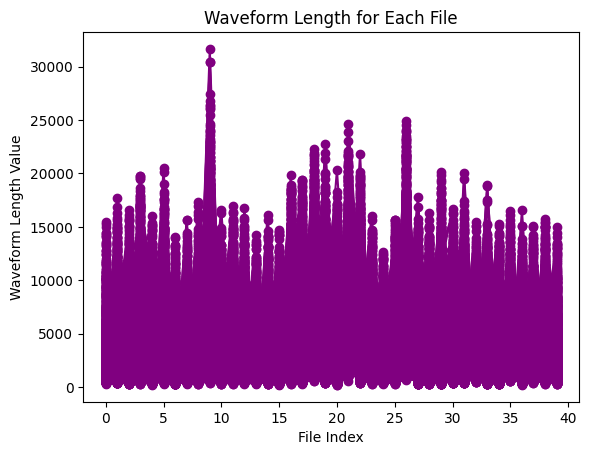

In [42]:
waveform_length_values = np.apply_along_axis(waveform_length, axis=1, arr=data)

# Plot the Waveform Length values
plt.plot(waveform_length_values, marker='o', linestyle='-', color='purple')
plt.title('Waveform Length for Each File')
plt.xlabel('File Index')
plt.ylabel('Waveform Length Value')
plt.show()

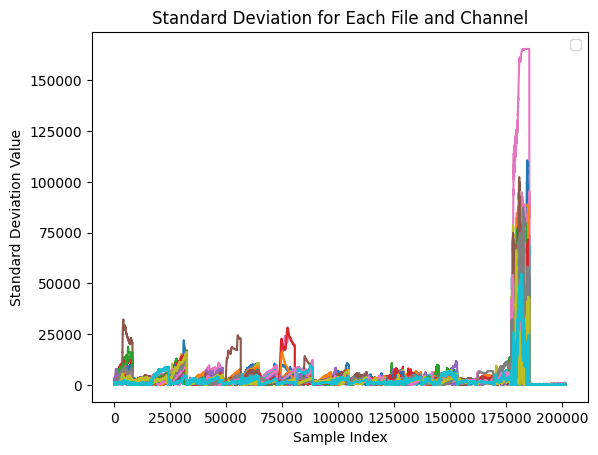

In [43]:
# Initialize arrays to store values
std_deviation_values = []
mav_values = []
rms_values = []

# Calculate Standard Deviation, MAV, and RMS for each file
for dat_file in dat_files:
    file_path = os.path.join(path, dat_file)

    # Load data from .dat file
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='latin1')

    data = data['data']

    # Assuming data shape is (40, 40, 8064), adjust if needed
    #data = data.reshape((40, 40, 8064))

    # Calculate Standard Deviation for each file
    std_deviation_values.append(np.std(data, axis=1))

    # Calculate MAV and RMS for each file
    mav_values.append(np.apply_along_axis(mean_absolute_value, axis=1, arr=data))
    rms_values.append(np.apply_along_axis(root_mean_square, axis=1, arr=data))

concatenated_values = np.concatenate(std_deviation_values, axis=1)

    # Plot the Standard Deviation values
for i in range(concatenated_values.shape[0]):
    plt.plot(concatenated_values[i, :])

plt.title('Standard Deviation for Each File and Channel')
plt.xlabel('Sample Index')
plt.ylabel('Standard Deviation Value')
plt.legend()
plt.show()



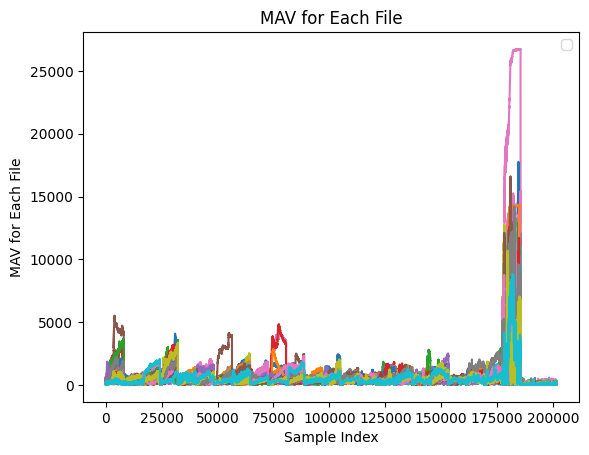

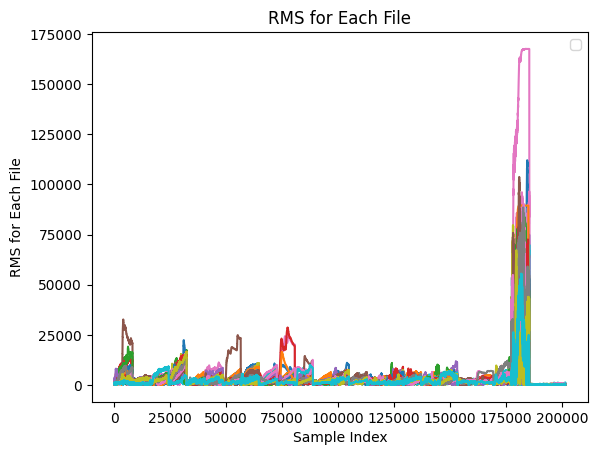

In [44]:
concatenated_values = np.concatenate(mav_values, axis=1)

    # Plot the Standard Deviation values
for i in range(concatenated_values.shape[0]):
    plt.plot(concatenated_values[i, :])

plt.title('MAV for Each File')
plt.xlabel('Sample Index')
plt.ylabel('MAV for Each File')
plt.legend()
plt.show()


concatenated_values = np.concatenate(rms_values, axis=1)

    # Plot the Standard Deviation values
for i in range(concatenated_values.shape[0]):
    plt.plot(concatenated_values[i, :])

plt.title('RMS for Each File')
plt.xlabel('Sample Index')
plt.ylabel('RMS for Each File')
plt.legend()
plt.show()



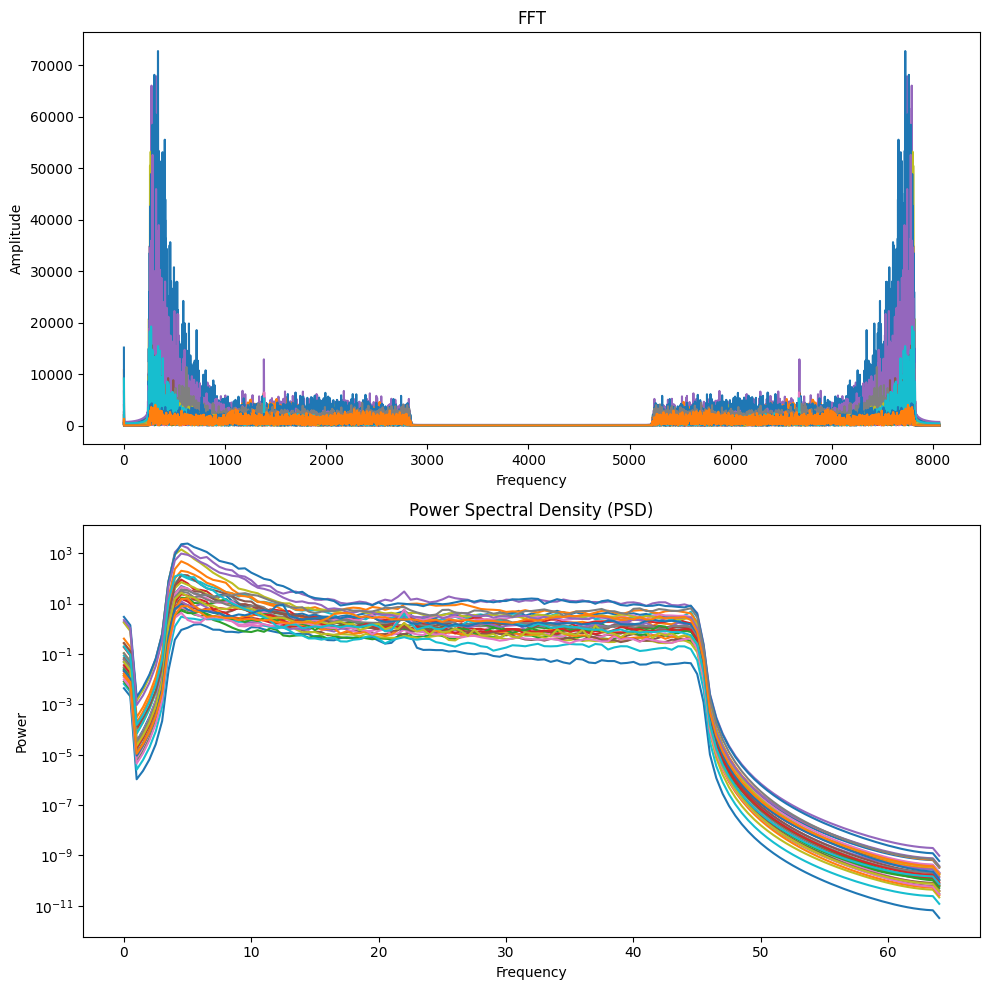

In [53]:

# Function to compute FFT and PSD
def frequency_domain_features(data):
    # Compute FFT
    fft_data = np.fft.fft(data, axis=2)

    # Compute PSD using Welch's method
    f, psd = welch(data, fs=128, axis=2)

    return fft_data, f, psd



# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Load each .dat file, compute frequency domain features, and plot
for dat_file in dat_files:
    file_path = os.path.join(path, dat_file)

    # Load data from .dat file
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='latin1')

    data = data['data']

    # Assuming data shape is (40, 40, 8064), adjust if needed
    data = data.reshape((40, 40, 8064))

    # Compute frequency domain features
    fft_data, f, psd = frequency_domain_features(data)

    # Plot FFT
    axs[0].plot(np.abs(fft_data[0, 0]))  # Plotting the FFT of the first channel of the first instance

    # Plot PSD
    axs[1].semilogy(f, psd[0, 0])  # Plotting the PSD of the first channel of the first instance

# Set titles and labels
axs[0].set_title('FFT')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')
axs[1].set_title('Power Spectral Density (PSD)')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Power')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


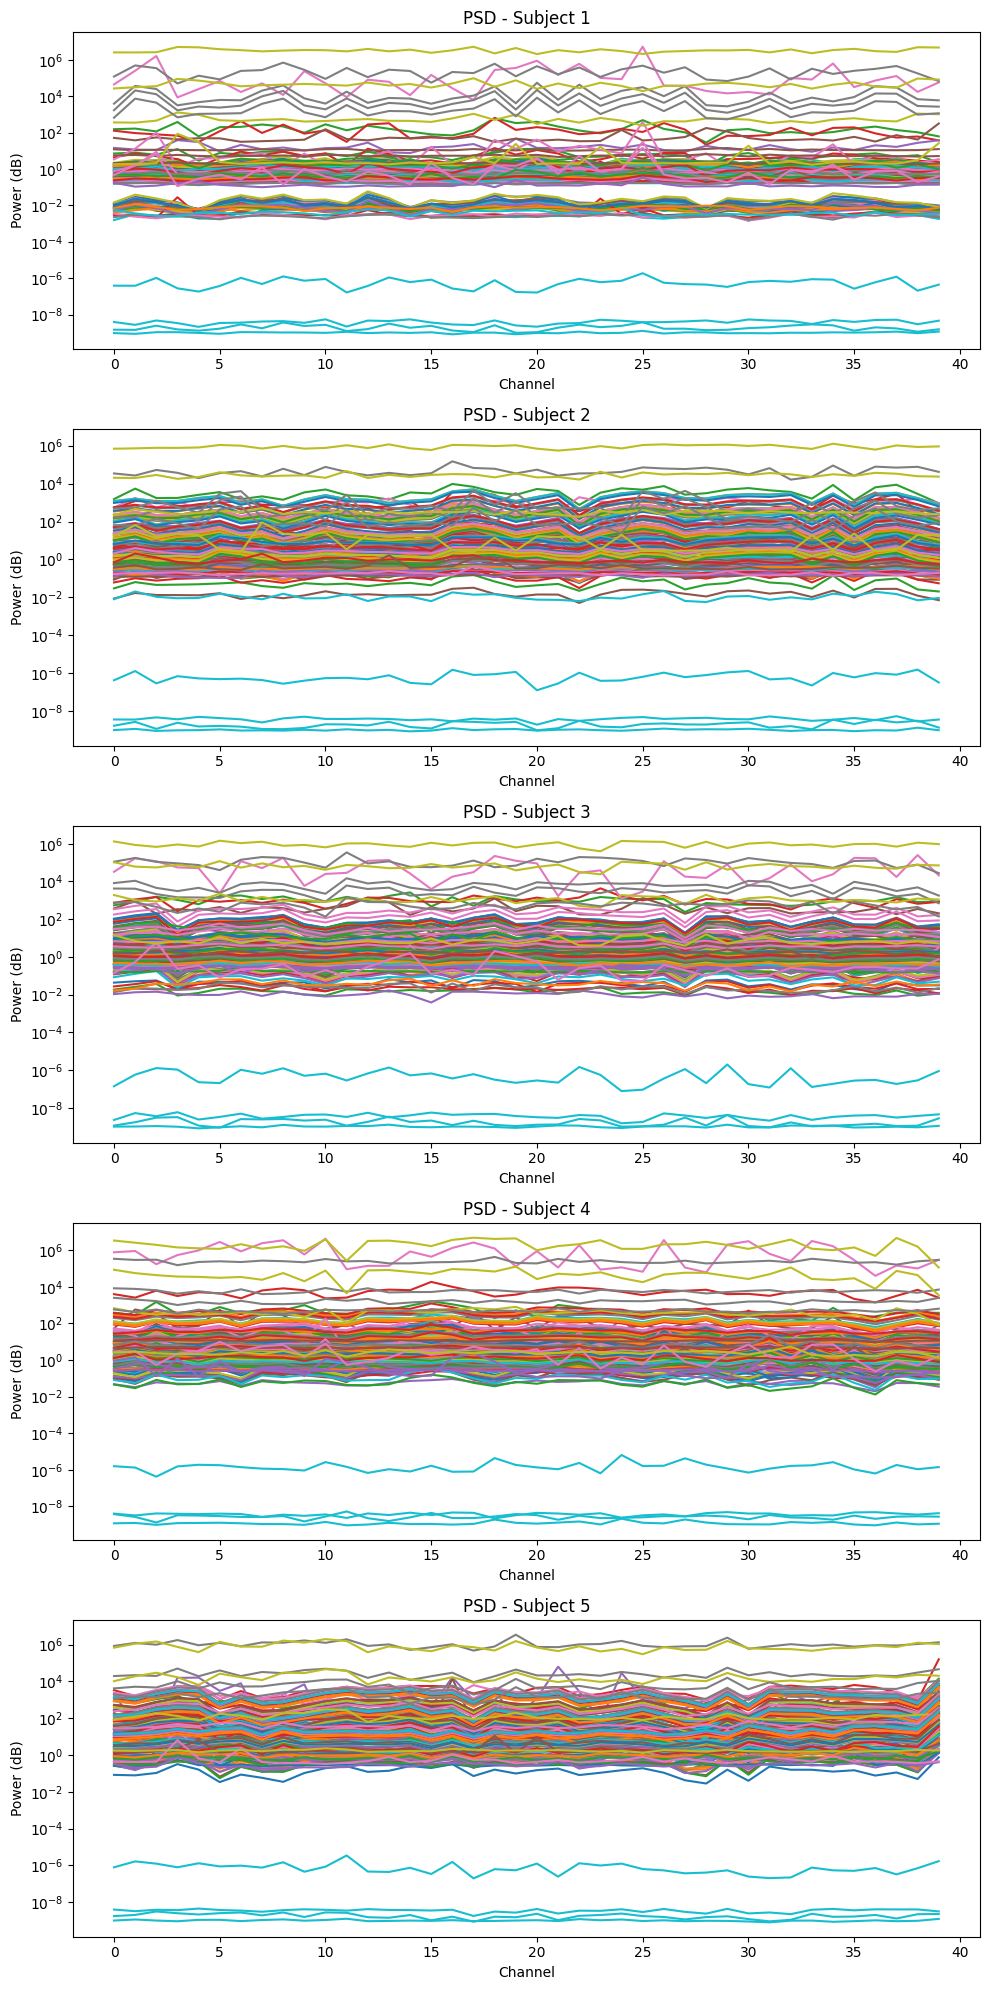

In [54]:
# Function to compute PSD for specific frequency bands
def extract_band_psd(data):
    # Define frequency bands (in Hz)
    frequency_ranges = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 100)
    }

    # Sampling frequency (Hz)
    fs = 128

    # Compute PSD using Welch's method
    f, psd = welch(data, fs=fs, axis=2)

    # Initialize dictionary to store PSD for each band
    band_psd = {}

    # Compute PSD for each frequency band
    for band, (f_low, f_high) in frequency_ranges.items():
        # Find indices corresponding to the frequency band
        idx_low = np.argmax(f >= f_low)
        idx_high = np.argmax(f >= f_high)

        # Compute PSD within the frequency band
        band_psd[band] = np.mean(psd[..., idx_low:idx_high], axis=-1)

    return band_psd




# Select the first 5 files (subjects)
dat_files = dat_files[:5]

# Create subplots for each subject
fig, axs = plt.subplots(5, figsize=(10, 20))

# Load and analyze each subject
for idx, dat_file in enumerate(dat_files):
    file_path = os.path.join(path, dat_file)

    # Load data from .dat file
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='latin1')

    data = data['data']

    # Assuming data shape is (40, 40, 8064), adjust if needed
    data = data.reshape((40, 40, 8064))

    # Extract band-specific PSD
    band_psd = extract_band_psd(data)

    # Plot PSD for each band
    for band, psd_values in band_psd.items():
        axs[idx].semilogy(psd_values, label=band)

    axs[idx].set_title(f'PSD - Subject {idx + 1}')
    axs[idx].set_xlabel('Channel')
    axs[idx].set_ylabel('Power (dB)')
    #axs[idx].legend()

plt.tight_layout()
plt.show()

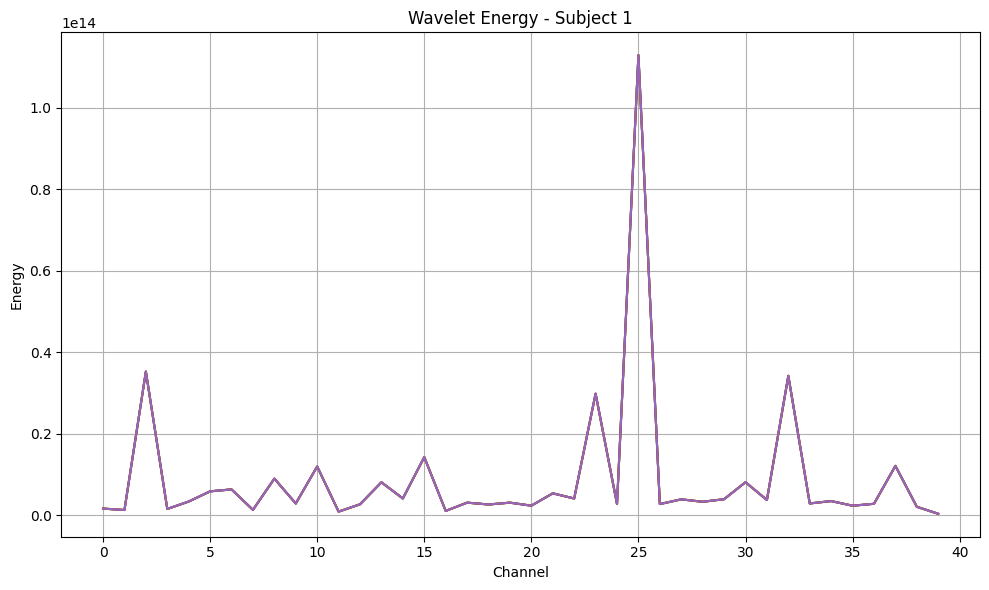

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import welch

# Function to compute wavelet energy for specific frequency bands
def extract_wavelet_energy(data):
    # Define frequency bands (in Hz)
    frequency_ranges = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 100)
    }

    # Sampling frequency (Hz)
    fs = 128

    # Number of decomposition levels
    level = 5

    # Initialize dictionary to store wavelet energy for each band
    band_energy = {}

    # Perform wavelet transform and compute energy for each frequency band
    for band, (f_low, f_high) in frequency_ranges.items():
        # Perform wavelet transform using 'db4' wavelet
        coeffs = pywt.wavedec(data, 'db4', level=level, axis=2)

        # Initialize energy array
        energy = np.zeros((40, len(coeffs)))

        # Compute energy for each decomposition level
        for i, coeff in enumerate(coeffs):
            # Compute energy by summing squares of coefficients
            energy[:, i] = np.sum(coeff ** 2, axis=(1, 2))  # Sum across time and channels

        # Sum energy across decomposition levels to get total wavelet energy
        band_energy[band] = np.sum(energy, axis=1)

    return band_energy


# Load data from a specific subject
subject_file = 's01.dat'
file_path = os.path.join(path, subject_file)

# Load data from .dat file
with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

data = data['data']

# Assuming data shape is (40, 40, 8064), adjust if needed
data = data.reshape((40, 40, 8064))

# Extract wavelet energy for each frequency band
band_energy = extract_wavelet_energy(data)

# Plot wavelet energy for each frequency band
plt.figure(figsize=(10, 6))

for band, energy_values in band_energy.items():
    plt.plot(energy_values, label=band)

# Set plot labels and legend
plt.title('Wavelet Energy - Subject 1')
plt.xlabel('Channel')
plt.ylabel('Energy')


plt.grid(True)
plt.tight_layout()
plt.show()

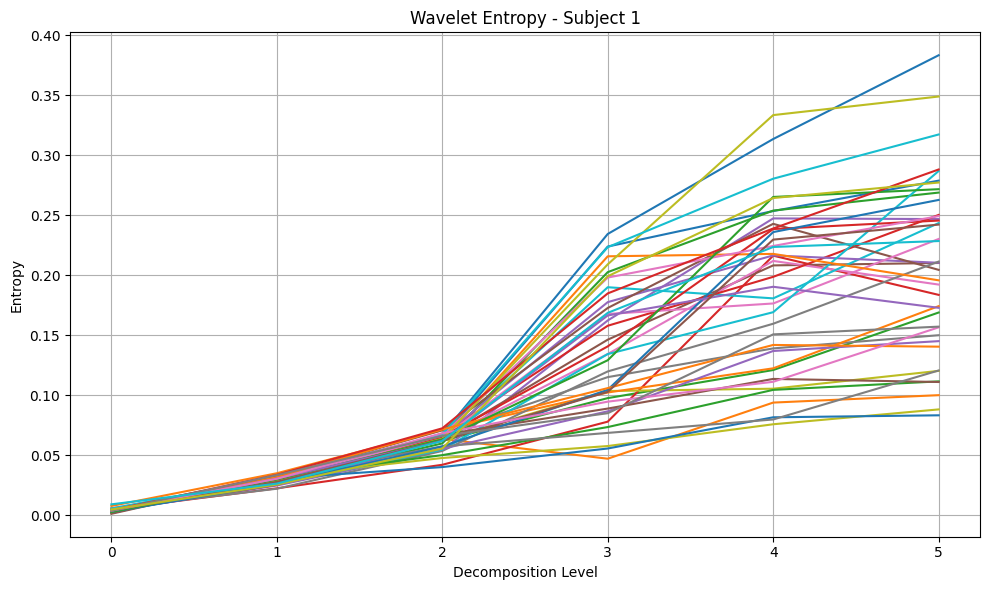

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pickle

# Function to compute wavelet entropy for specific frequency bands
def extract_wavelet_entropy(data):
    # Sampling frequency (Hz)
    fs = 128

    # Number of decomposition levels
    level = 5

    # Initialize dictionary to store wavelet entropy for each channel
    channel_entropy = {}

    # Perform wavelet transform and compute entropy for each channel
    for i in range(data.shape[0]):
        # Perform wavelet transform using 'db4' wavelet
        coeffs = pywt.wavedec(data[i], 'db4', level=level)

        # Compute entropy for each decomposition level
        entropy_values = np.zeros(len(coeffs))

        for j, coeff in enumerate(coeffs):
            # Compute histogram of wavelet coefficients
            hist, _ = np.histogram(coeff, bins=100, density=True)

            # Compute Shannon entropy
            entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))
            entropy_values[j] = entropy

        # Store entropy values for the channel
        channel_entropy[i] = entropy_values

    return channel_entropy


# Load data from a specific subject
subject_file = 's01.dat'
file_path = os.path.join(path, subject_file)

# Load data from .dat file
with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')
    data = data['data']
    data = data.reshape((40, 40, 8064))

# Extract wavelet entropy for each channel
channel_entropy = extract_wavelet_entropy(data)

# Plot wavelet entropy for each channel
plt.figure(figsize=(10, 6))

for channel, entropy_values in channel_entropy.items():
    plt.plot(entropy_values, label=f'Channel {channel}')

# Set plot labels and legend
plt.title('Wavelet Entropy - Subject 1')
plt.xlabel('Decomposition Level')
plt.ylabel('Entropy')
plt.grid(True)
plt.tight_layout()
plt.show()

